In [ ]:
`%%capture
!pip install torch

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

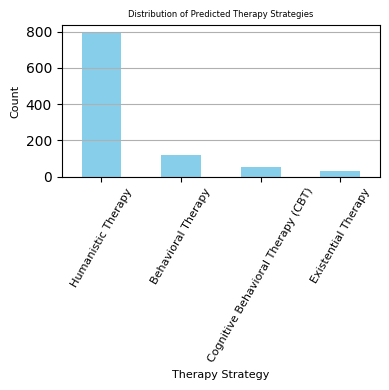

In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification

model_path = "saved_model"
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)
model.eval()

file_path = 'unique_contexts_with_dynamic_responses.csv'
df = pd.read_csv(file_path)

strategy_mapping = {
    0: "Gestalt Therapy",
    1: "Cognitive Behavioral Therapy (CBT)",
    2: "Psychodynamic Therapy",
    3: "Existential Therapy",
    4: "Behavioral Therapy",
    5: "Humanistic Therapy"
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def classify_response(response):
    inputs = tokenizer(response, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
        predicted_label = torch.argmax(outputs.logits, dim=1).item()
    return predicted_label

df['Predicted_Strategy'] = df['Generated_Response'].apply(classify_response)

df['Predicted_Strategy'] = df['Predicted_Strategy'].map(strategy_mapping)

plt.figure(figsize=(4, 4))
df['Predicted_Strategy'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Therapy Strategy',fontsize= 8)
plt.ylabel('Count',fontsize=8)
plt.title('Distribution of Predicted Therapy Strategies',fontsize=8)
plt.xticks(rotation=60, fontsize=8)
plt.grid(axis='y')
plt.tight_layout()
plt.show()